## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

## Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('EastWestAirlines (1).csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# scale the numeric features of the dataset using minmax scaler.exclude the Univ feature
from  sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df.drop('ID#',axis=1))
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[1:])
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [4]:
df_scaled.describe().round(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000
mean,0.043,0.013,0.265,0.007,0.003,0.065,0.135,0.015,0.026,0.496,0.370
std,0.059,0.069,0.344,0.074,0.049,0.092,0.112,0.045,0.072,0.249,0.483
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.011,0.000,0.000,0.000,0.000,0.005,0.035,0.000,0.000,0.281,0.000
50%,0.025,0.000,0.000,0.000,0.000,0.027,0.140,0.000,0.000,0.494,0.000
75%,0.054,0.000,0.500,0.000,0.000,0.090,0.198,0.010,0.019,0.698,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


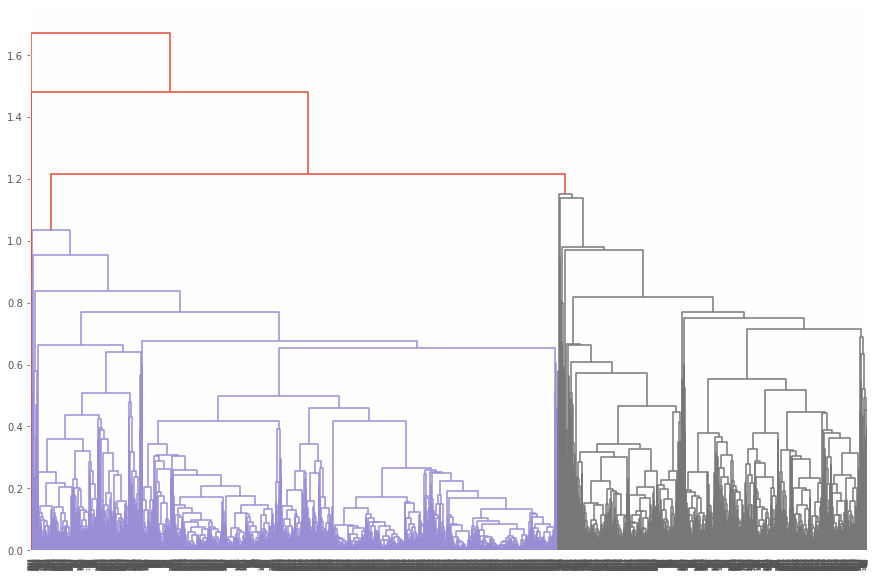

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(df_scaled,method='average')
plt.figure(figsize=(15,10))
dendrogram(link,labels=df['ID#'].values);

In [6]:
# clustering using agglomerative clustering from sklearn
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [7]:
labels=agglo.fit_predict(df_scaled)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
df['cluster_labels']=labels
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


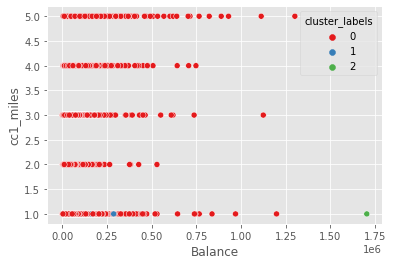

In [9]:
#scatter plot between sat score and acceptance rate ,hue=cluster_labels
sns.scatterplot(x='Balance',y='cc1_miles',data=df, hue='cluster_labels',palette='Set1');

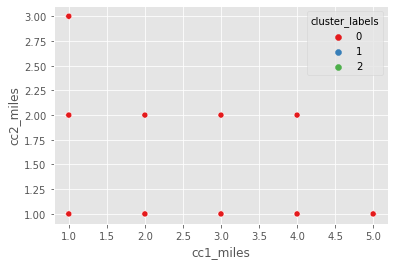

In [10]:
#scatter plot between sat score and acceptance rate ,hue=cluster_labels
sns.scatterplot(x='cc1_miles',y='cc2_miles',data=df, hue='cluster_labels',palette='Set1');

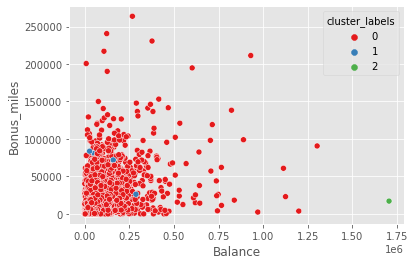

In [11]:
#scatter plot between sat score and acceptance rate ,hue=cluster_labels
sns.scatterplot(x='Balance',y='Bonus_miles',data=df, hue='cluster_labels',palette='Set1');

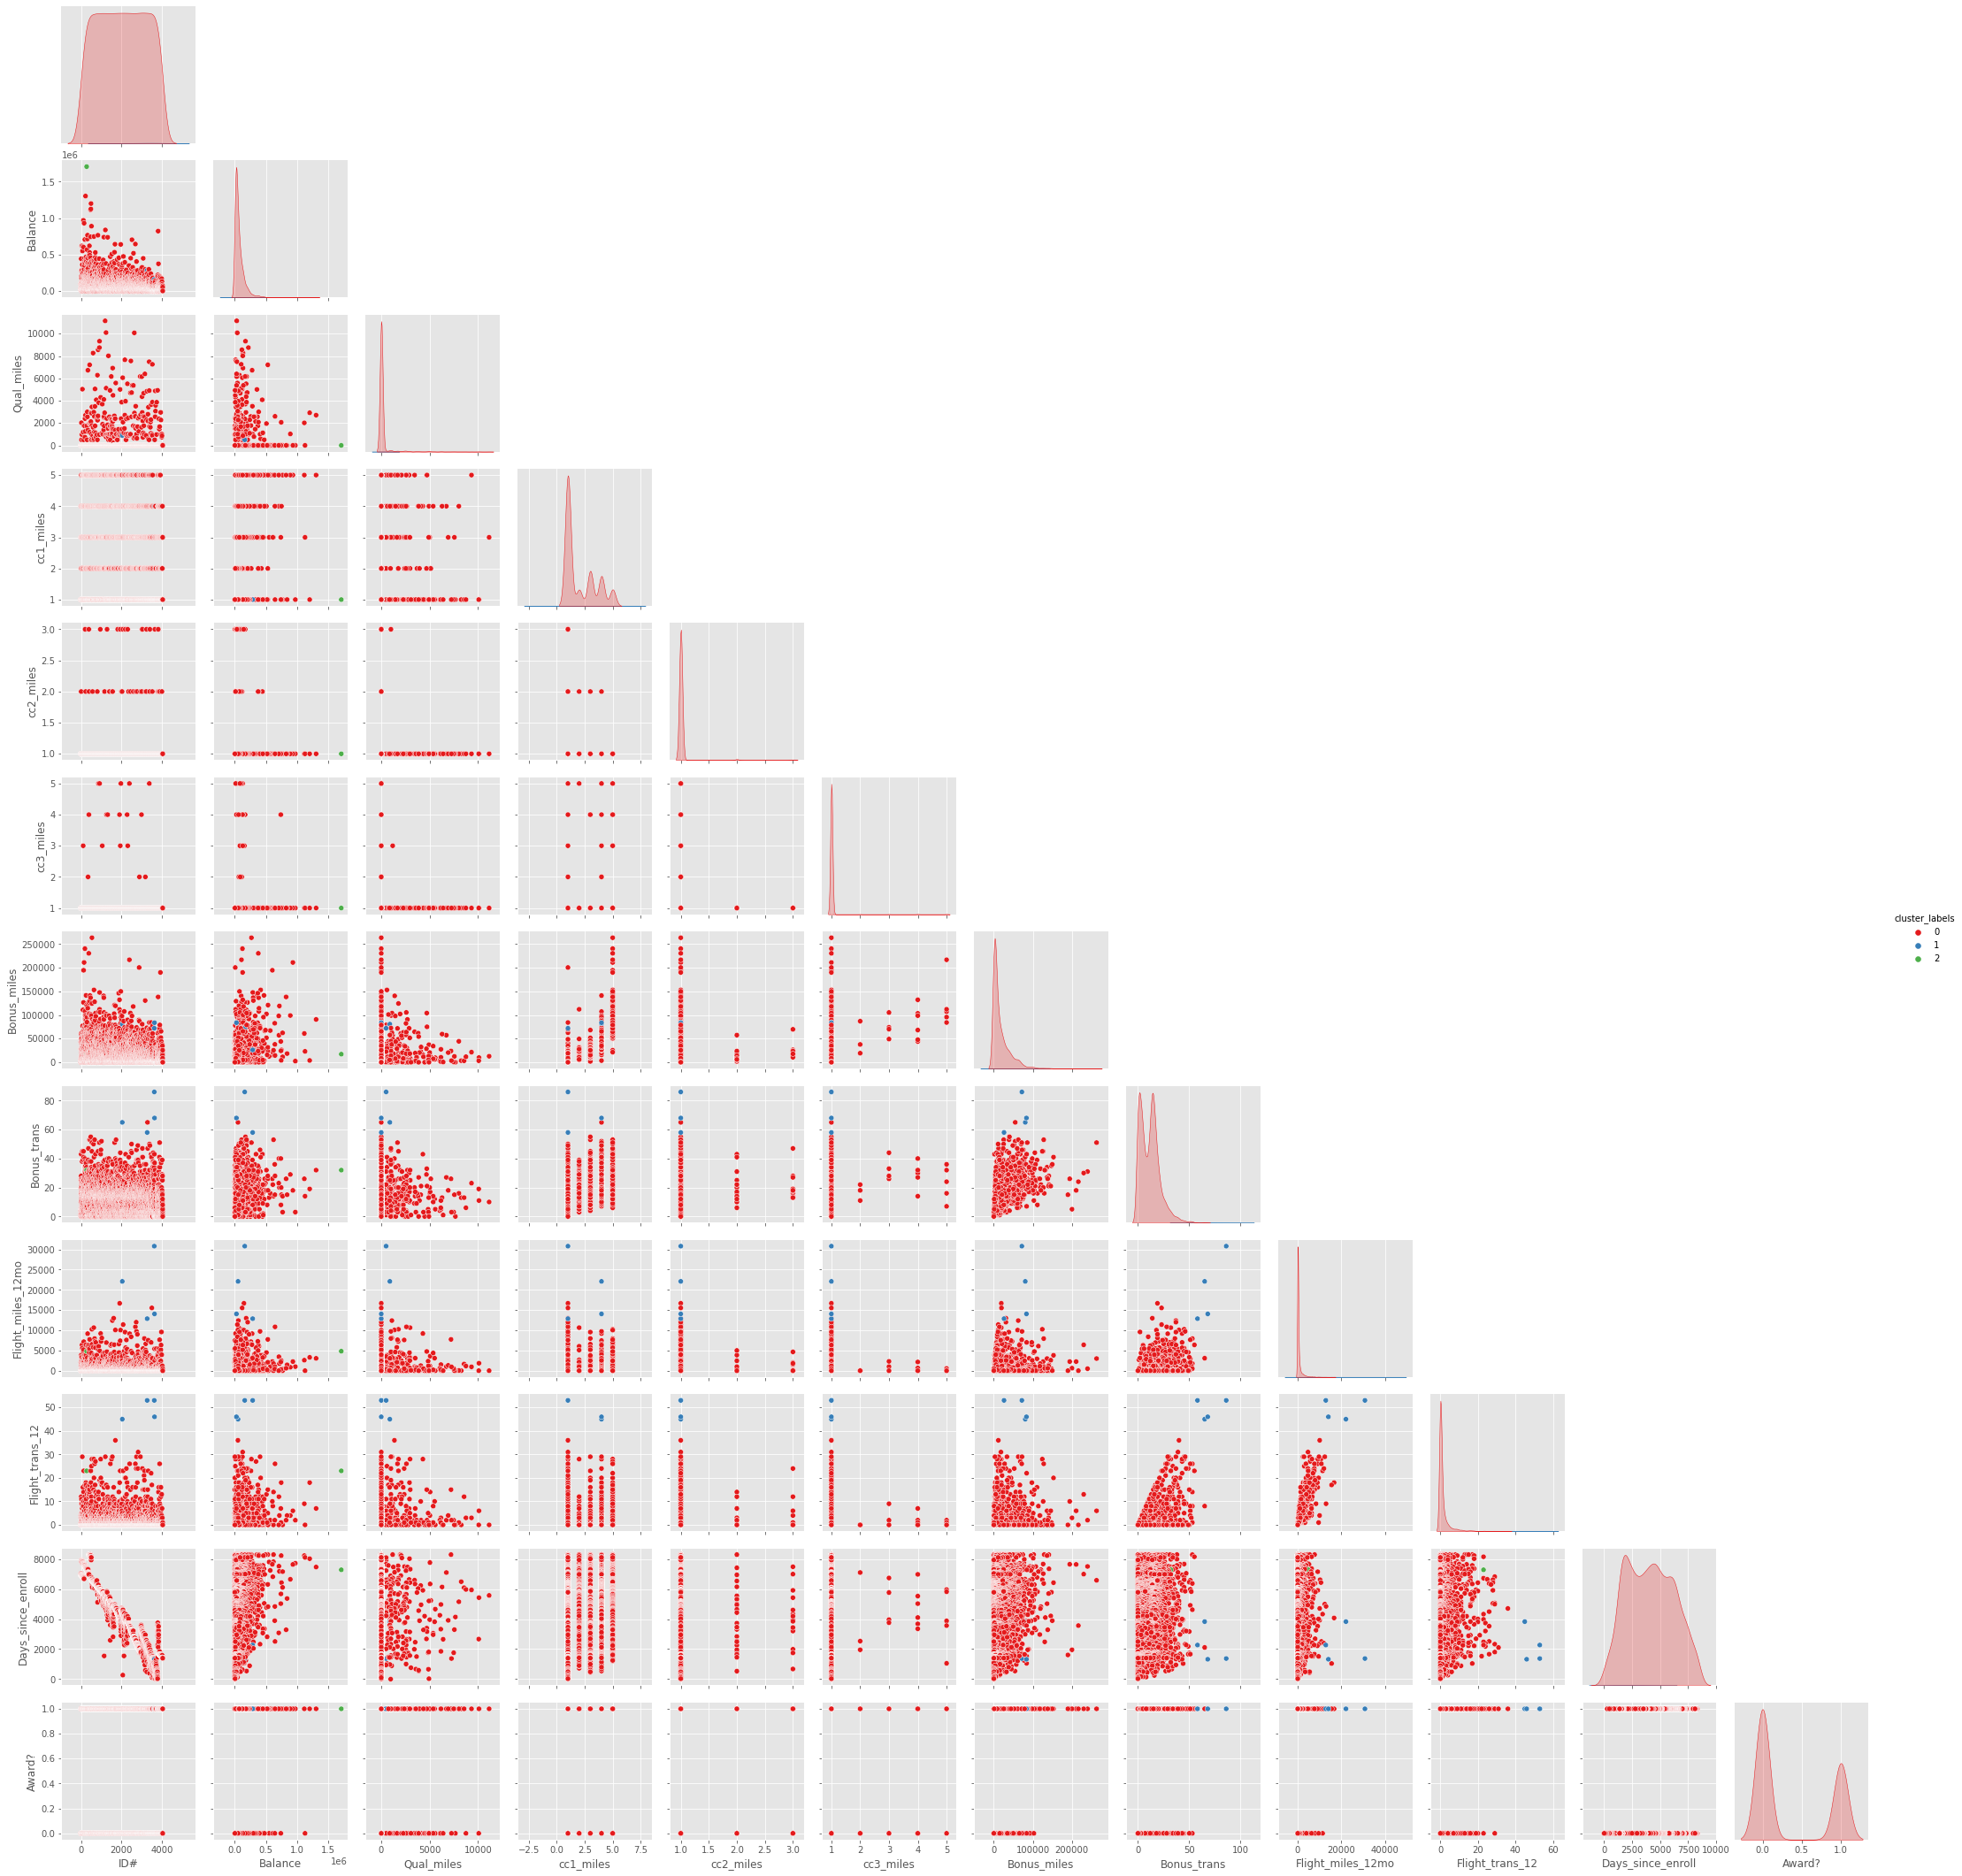

In [12]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df,hue='cluster_labels',palette='Set1',corner=True);

In [13]:
# generate the cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_labels,,,,,,,,,,,
0,73134.42,143.95,2.06,1.01,1.01,17096.29,11.54,439.43,1.32,4119.69,0.37
1,131999.50,347.00,2.50,1.00,1.00,65634.25,69.25,19960.00,49.25,2200.25,1.00
2,1704838.00,0.00,1.00,1.00,1.00,17108.00,32.00,4823.00,23.00,7283.00,1.00


## KMeans Clustering

In [14]:
# scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])

In [17]:
# finding optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wss.append(kmeans.inertia_)

In [18]:
wss

[47988.0,
 39399.14900784997,
 34411.06156455595,
 30506.541130543126,
 26773.996751427727,
 24540.107042093114,
 21126.041886227027,
 19603.391863175784,
 17012.25082598649,
 15735.13702461479,
 14525.283720854159,
 13765.794959914349,
 13027.15271493251,
 12291.600073382437,
 11941.090779990465]

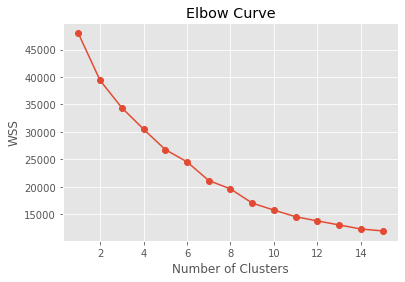

In [19]:
# plot the elbow curve
plt.plot(range(1,16), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

In [20]:
# optimum number of cluster is 2. implement a kmeans clustering modek with k =2 and get the labels
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [21]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
df['cluster_labels'] = labels
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [23]:
# cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_labels,,,,,,,,,,,
0,132849.454965,258.394149,3.612009,1.010008,1.036952,41481.426482,20.393380,969.467283,2.909161,4941.665127,0.709777
1,45096.395185,89.133333,1.312593,1.016667,1.000370,5436.247037,7.372222,214.972222,0.634815,3722.554074,0.207037


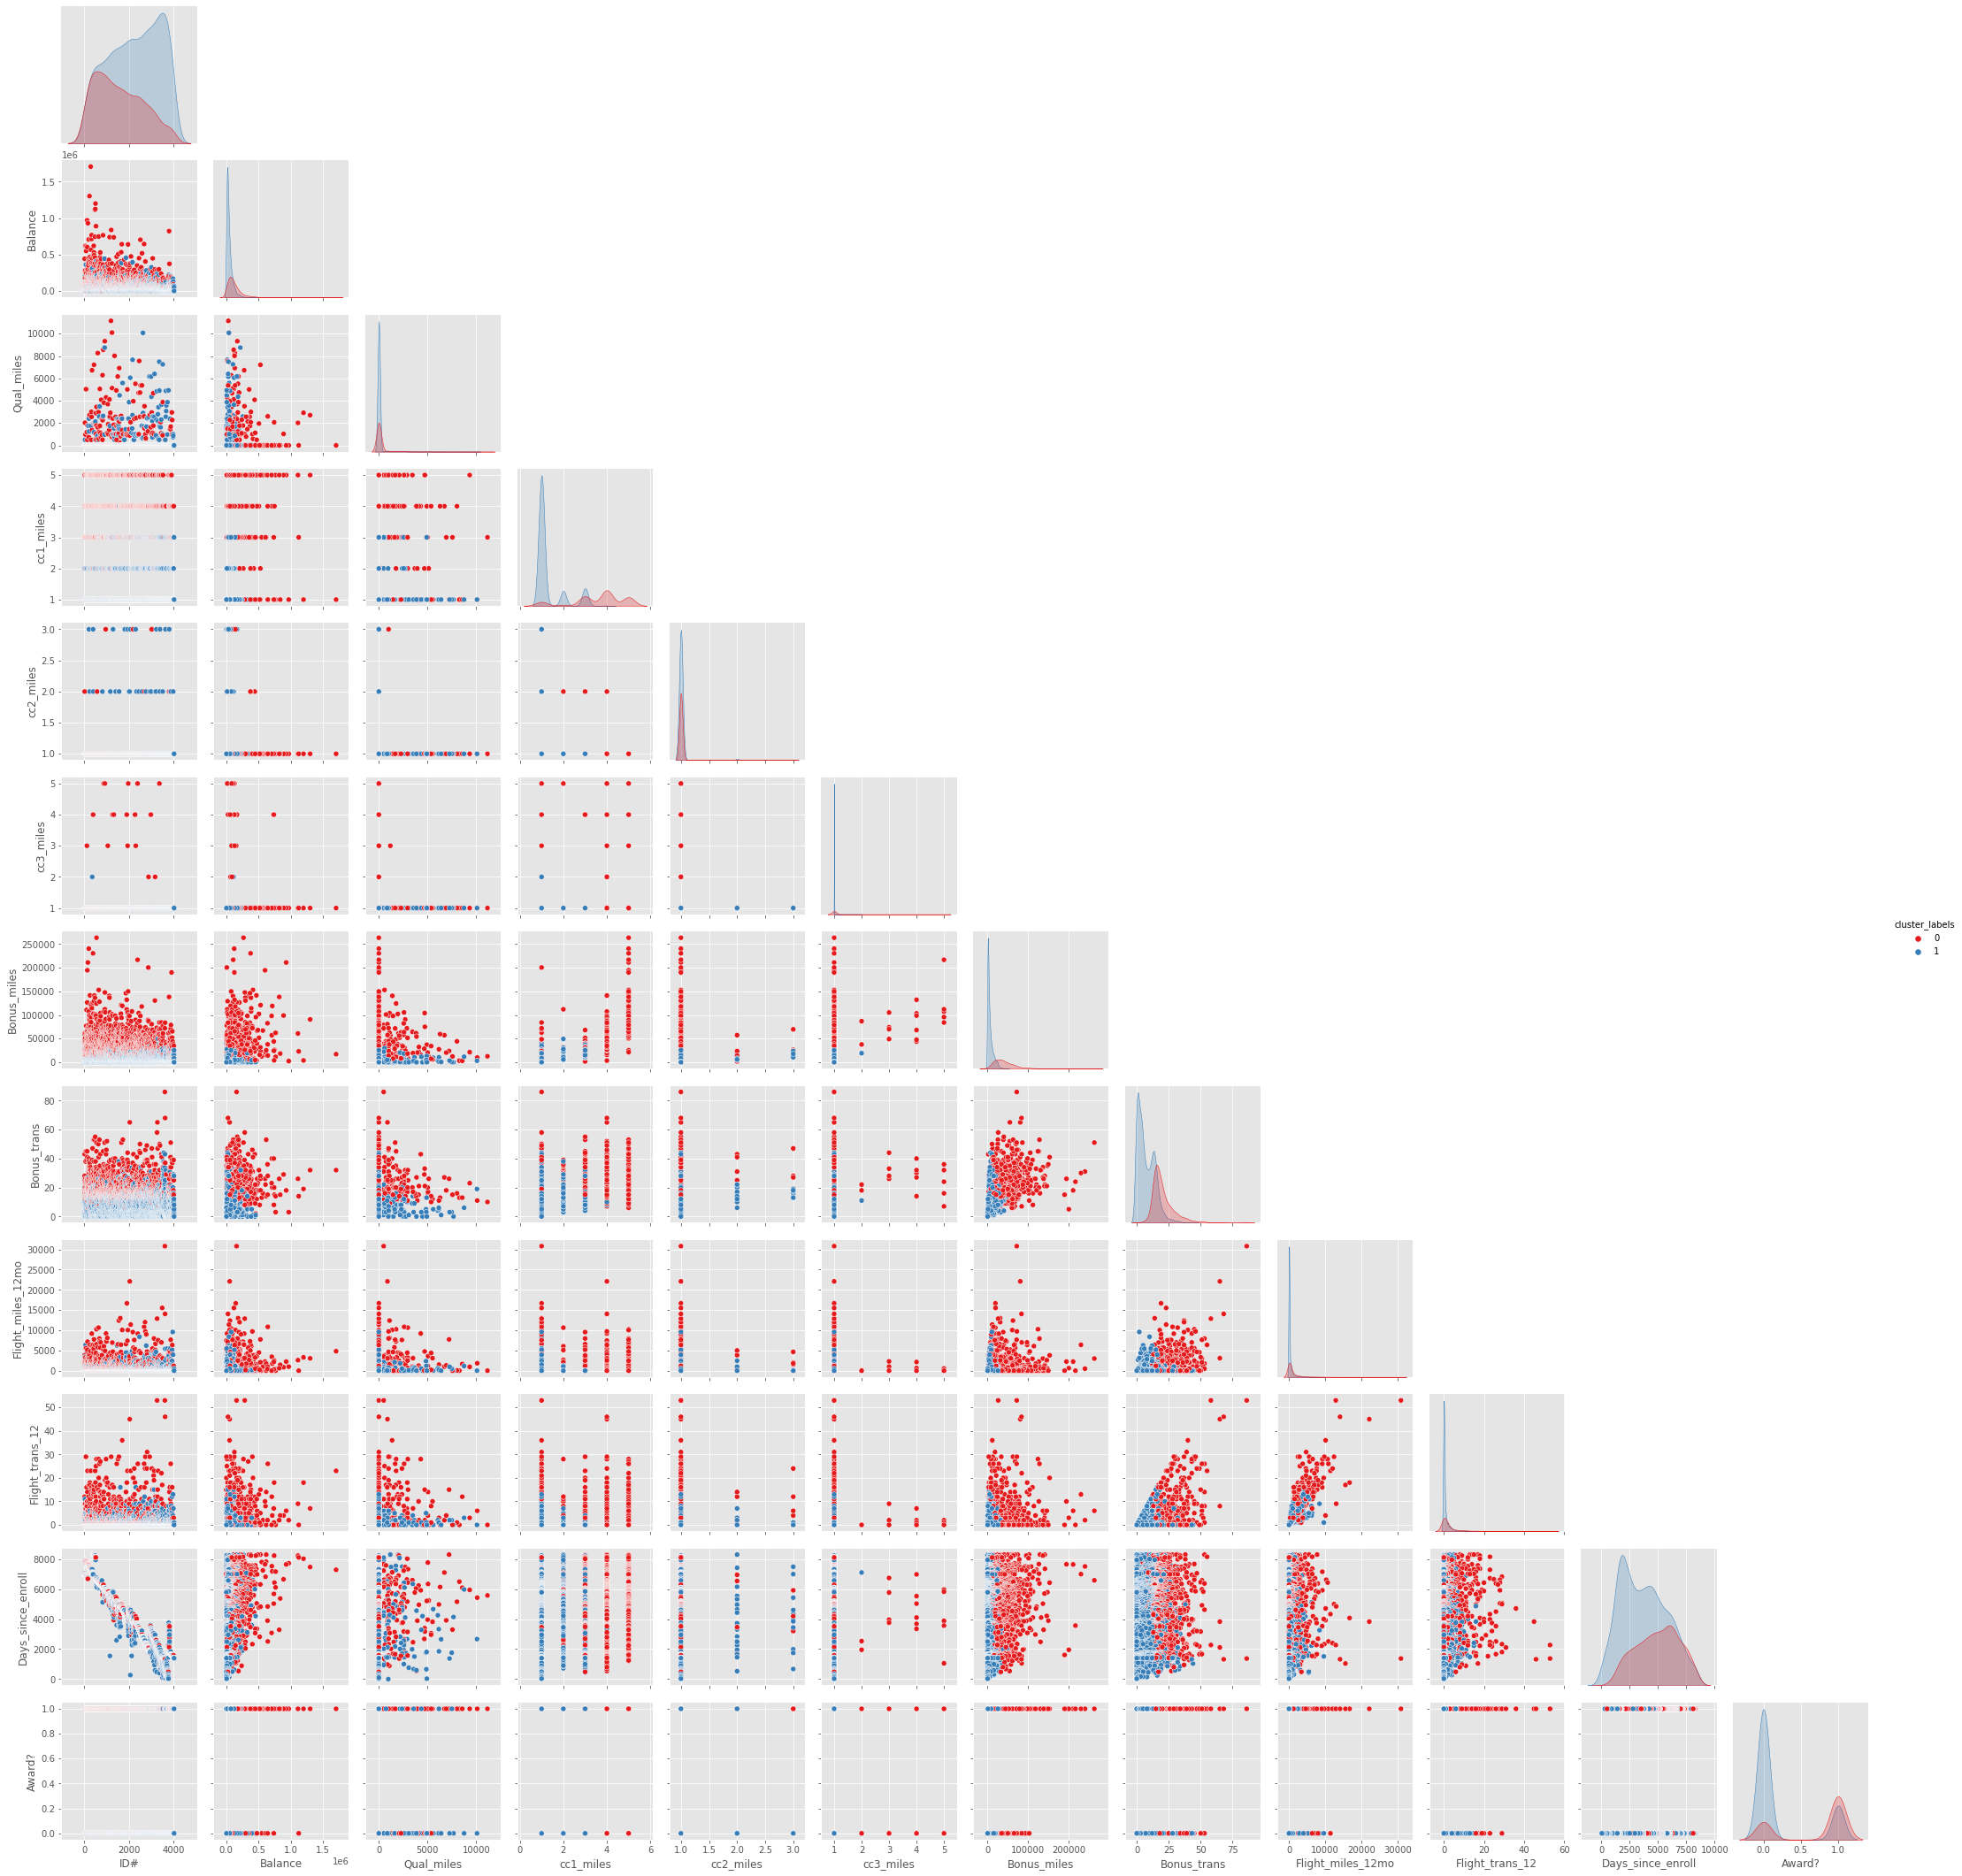

In [24]:
# plot a pairplot with cluster label as hue
sns.pairplot(df, hue='cluster_labels', palette='Set1',corner=True);

In [25]:
# sihouette score for a set of cluster numbers
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df)
    ss.append(silhouette_score(scaled_df, km.labels_))

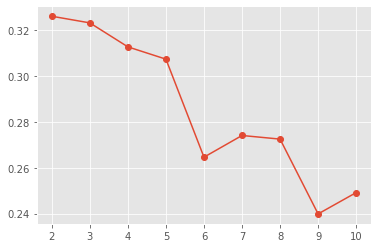

In [29]:
plt.plot(range(2,11), ss, marker='o');

In [30]:
ss

[0.3260258332820484,
 0.32312968403112935,
 0.3126798168845241,
 0.3073234196009827,
 0.26460043124808513,
 0.27405238537974647,
 0.2724717750574523,
 0.23986632346650474,
 0.24915727920057618]

## DBSCAN Clustering

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [32]:
array=df.values

In [33]:
array

array([[    1, 28143,     0, ...,  7000,     0,     1],
       [    2, 19244,     0, ...,  6968,     0,     1],
       [    3, 41354,     0, ...,  7034,     0,     1],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     1],
       [ 4020, 54899,     0, ...,  1401,     0,     1],
       [ 4021,  3016,     0, ...,  1398,     0,     1]], dtype=int64)

In [34]:
standardscaler = StandardScaler().fit(array)
X = standardscaler.transform(array)

In [35]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  6.93621735e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  6.93621735e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  6.93621735e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  6.93621735e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  6.93621735e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  6.93621735e-01]])

In [36]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [37]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [39]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [40]:
pd.concat([df,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [41]:
from sklearn.datasets import make_blobs,make_moons

In [45]:
x,y=make_moons(n_samples=3999,shuffle=True,noise=0.05,random_state=1)

In [46]:
x_df=pd.DataFrame(x,columns=['x1','x2'])
x_df['y']=y

In [47]:
x_df.head()

,x1,x2,y
0,0.907251,0.282769,0
1,-0.131920,0.924222,0
2,0.716417,0.939950,0
3,0.877222,-0.454253,1
4,-0.316311,1.083354,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

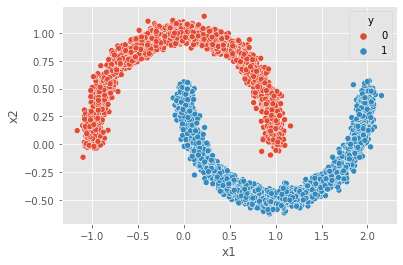

In [48]:
# scatter plot 
sns.scatterplot(x='x1',y='x2',hue='y',data=x_df)

In [49]:
# instantiate a dbscan model object with some value of eps and min samples and fit it to the data
dbscan_moons=DBSCAN(eps=0.2,min_samples=5)
labels_moon=dbscan_moons.fit_predict(x_df[['x1','x2']])
labels_moon

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

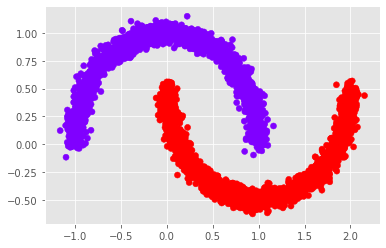

In [50]:
# plot the clusters with labels
plt.scatter(x_df['x1'],x_df['x2'],c=labels_moon,cmap='rainbow');

In [51]:
# take a set of epsilons and min_samples for experimentation,say 4 each
epsilon=[0.1,0.2,0.3,0.4]
samples=[2,3,4,5]

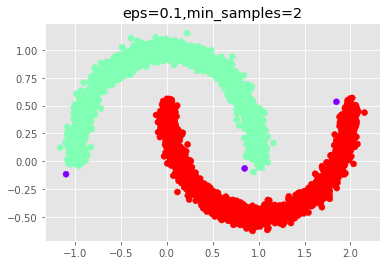

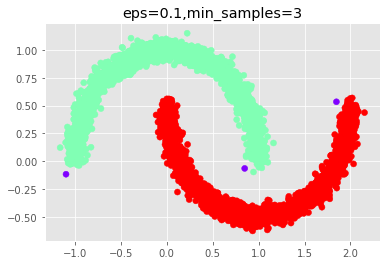

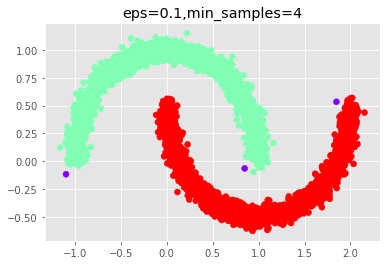

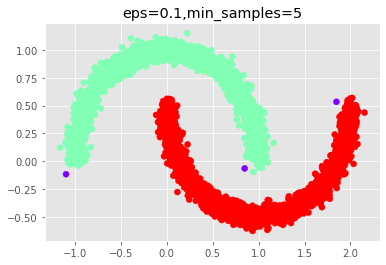

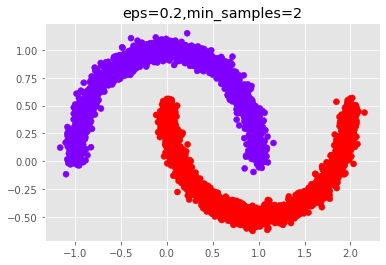

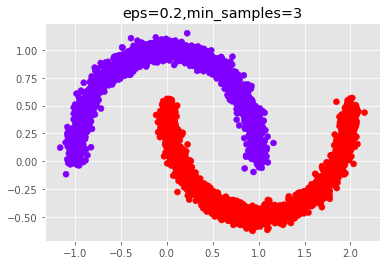

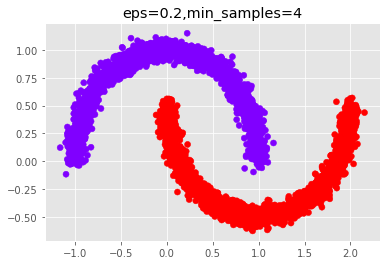

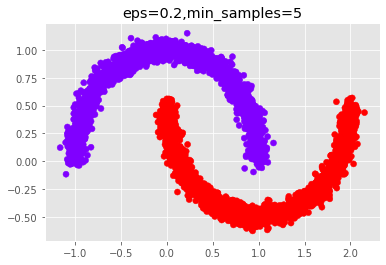

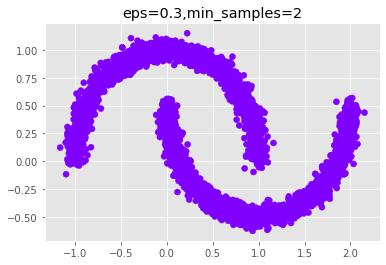

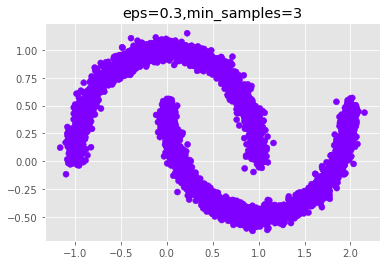

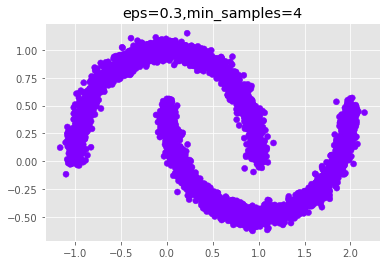

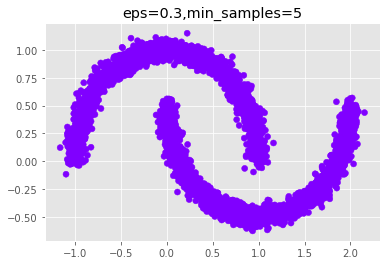

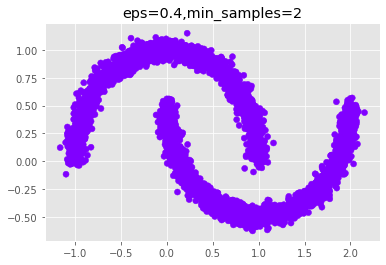

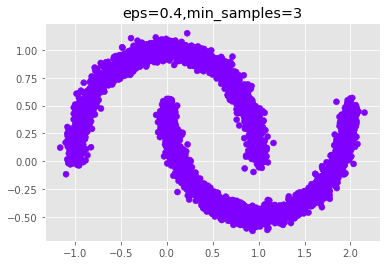

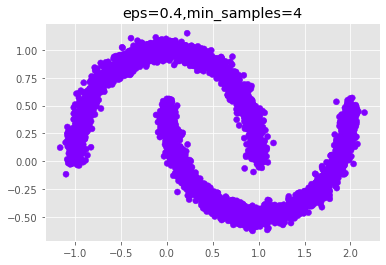

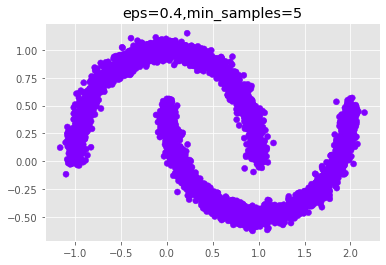

In [52]:
# create dbscan clustering for each combination of eps and min_samples and plot the clusters 
for e in epsilon:
    for s in samples:
        dbscan_moons=DBSCAN(eps=e,min_samples=s)
        labels_moon=dbscan_moons.fit_predict(x_df[['x1','x2']])
        plt.scatter(x_df['x1'],x_df['x2'],c=labels_moon,cmap='rainbow')
        plt.title('eps={},min_samples={}'.format(e,s))
        plt.show()

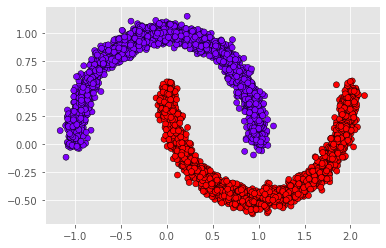

In [53]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow',edgecolors='k');

## From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.